<a href="https://colab.research.google.com/github/MicroPyscho/Credit-Card-Fraud-Prediction-using-GAN/blob/main/PlaceContd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install evidently
!pip install facets-overview
!pip install yfinance
!pip install pandas stata-merge
!pip install plotly==5.20.0
!pip install --upgrade hvplot
!pip install --upgrade holoviews
!pip install lasio
!pip install -U ipykernel
!pip install --upgrade panel
!pip install gspread oauth2client


ERROR: Could not find a version that satisfies the requirement stata-merge (from versions: none)
ERROR: No matching distribution found for stata-merge


In [13]:
import pandas as pd
import plotly.express as px
import lasio as ls
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot
import hvplot.pandas
import holoviews as hv
import panel as pn
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials

from google.colab import output
output.enable_custom_widget_manager()

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
file_path = "/content/drive/MyDrive/fill_df_for_tableau - fill_df_for_tableau.csv"
df = pd.read_csv(file_path)

In [30]:
df.head(10)

,ticker,ISIN,ICBIC,ICBIN,fic,country,exchange,startyear,WC06011,WC07040,...,climate_vul,climate_economic,climate_governance,climate_readiness,climate_social,ai_ranking,ai_score,ai_govt,ai_tech,ai_infr
0,EMAARDEV,AEE001901017,35,Real Estate,ARE,United Arab Emirates,Dubai Financial Market,2017,2810,35101010,...,0.372438,0.710840,0.691174,0.584707,0.352107,16,72.395164,82.534294,51.880657,82.770540
1,DU,AEE000701012,15,Telecommunications,ARE,United Arab Emirates,Dubai Financial Market,2006,8210,15102015,...,0.372438,0.710840,0.691174,0.584707,0.352107,16,72.395164,82.534294,51.880657,82.770540
2,DAMAC,AED001301012,35,Real Estate,ARE,United Arab Emirates,Dubai Financial Market,2015,2810,35101010,...,0.372438,0.710840,0.691174,0.584707,0.352107,16,72.395164,82.534294,51.880657,82.770540
3,ETISALAT,AEE000401019,15,Telecommunications,ARE,United Arab Emirates,Abu Dhabi,2003,8210,15102015,...,0.372438,0.710840,0.691174,0.584707,0.352107,16,72.395164,82.534294,51.880657,82.770540
4,EMAARDEV,AEE001901017,35,Real Estate,ARE,United Arab Emirates,Dubai Financial Market,2017,2810,35101010,...,0.370544,0.710840,0.688813,0.585130,0.355736,19,71.596840,79.411280,53.328820,82.050430
5,ETISALAT,AEE000401019,15,Telecommunications,ARE,United Arab Emirates,Abu Dhabi,2003,8210,15102015,...,0.370544,0.710840,0.688813,0.585130,0.355736,19,71.596840,79.411280,53.328820,82.050430
6,DU,AEE000701012,15,Telecommunications,ARE,United Arab Emirates,Dubai Financial Market,2006,8210,15102015,...,0.370544,0.710840,0.688813,0.585130,0.355736,19,71.596840,79.411280,53.328820,82.050430
7,DU,AEE000701012,15,Telecommunications,ARE,United Arab Emirates,Dubai Financial Market,2006,8210,15102015,...,0.383769,0.285365,0.443493,0.382406,0.418360,22,68.544020,73.525110,52.189133,79.917816
8,LOMA,US54150E1047,50,Industrials,ARG,Argentina,NYSE,2017,2850,50101030,...,0.383769,0.285365,0.443493,0.382406,0.418360,53,50.753660,60.895645,30.604710,60.760624
9,TGSU23,ARP9308R1039,60,Energy,ARG,Argentina,Buenos Aires,1995,5820,60101035,...,0.383769,0.285365,0.443493,0.382406,0.418360,53,50.753660,60.895645,30.604710,60.760624


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


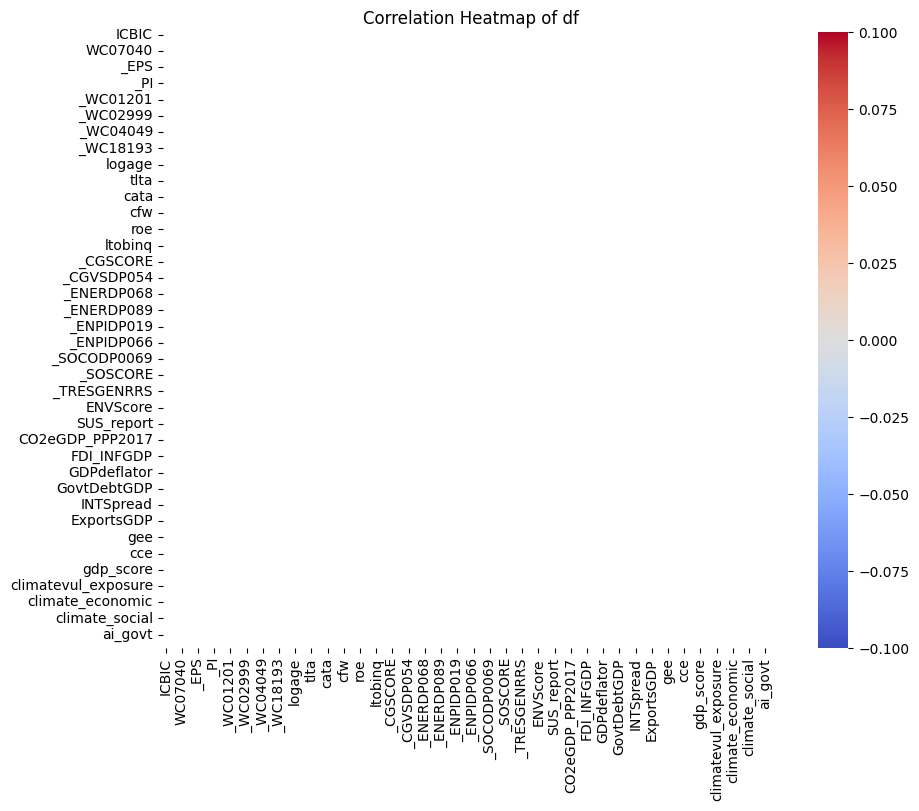

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_cols.corr()

# Generate a mask for the upper triangle
mask = ~corr.isnull()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True)

# Add title
plt.title('Correlation Heatmap of df')

# Show the plot
plt.show()
